# Necessary pip installs- more may be needed if program says module missing on your computer

    * pip install newsapi-python
    * pip install xlsx2html
    * pip install requests
    * pip install googletrans
    * pip install pypyodbc
    * pip install pymysql
    * pip install openfoodfacts==0.1.2

# SQL Commands Needed To Use SQL Section

You will need to create an SQL database called news.
These are the SQL commands:

    * CREATE DATABASE news;
    * USE news;
    * CREATE TABLE headline_titles(ID int NOT NULL AUTO_INCREMENT, Title varchar(255), Language varchar(255), Translation varchar(255), Url varchar(255),PRIMARY KEY (ID));

The database will need to be accessible on localhost, and with your user names and passwords set to below:


    #Connect to MySQL database

    db = MySQLdb.connect(host="localhost",    # your host, usually localhost
    user="root",                              # your username
    passwd="root",                            # your password
    db="news")                                # name of the data base

### In the code below I have commented out the MySQL update section, so the program can run without updating database

Write a country name:UK
1 Tesco
2 Asda
3 Sainsbury-s
4 Waitrose
5 By-sainsbury-s
6 Morrisons
7 Marks-spencer
8 M-s
9 Lidl
10 Coop
Write number for which brand you are interested in? e.g 11
1 Danish
2 Dutch
3 Finnish
4 French
5 German
6 Italian
7 Japanese
8 Luxembourgish
9 Malay
10 Romanian
11 Swedish
Choose a number to translate to language: e.g 1 danish1
status
totalResults
articles
20
UPDATE 1-Britain's Tesco to repay 585 mln stg in pandemic business rates relief - Reuters


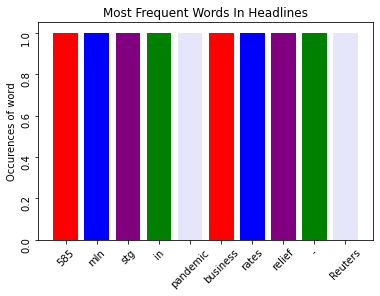

Find yous files here
C:\Users\Owner\Desktop\data_representation_assignment/analysis.xlsx
C:\Users\Owner\Desktop\data_representation_assignment/Output.html
an error occurred converting xls to html webpage


In [3]:
#Necessary pip installs from work on previous versions (more may be needed if program says module missing on your computer)

#pip install newsapi-python
#pip install xlsx2html
#pip install requests
#pip install googletrans
#pip install pypyodbc
#pip install pymysql
#pip install openfoodfacts==0.1.2

"--------------------------------------------------------------------------------------------------------------------------------------------------------"""

# Database is called news

# DROD DATABASE news;

# CREATE DATABASE news;
# USE news;
# CREATE TABLE headline_titles(ID int NOT NULL AUTO_INCREMENT, Title varchar(255), Language varchar(255), Translation varchar(255), Url varchar(255),PRIMARY KEY (ID));


"--------------------------------------------------------------------------------------------------------------------------------------------------------"""


#Setting up the imports

import webbrowser
import os
#from xlsx2html import xlsx2html #module to convert excel to html
import json
import requests
from newsapi import NewsApiClient
from googletrans import Translator
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
from openpyxl import Workbook, load_workbook
import openfoodfacts
import collections
import matplotlib.pyplot as plt

"--------------------------------------------------------------------------------------------------------------------------------------------------------"""


country_picker = input("Write a country name:")

brands = openfoodfacts.facets.get_brands(country_picker)

brand_dictionary = {}


brand_counter = 1
for brand_name in brands:
    print(brand_counter,brand_name["name"])
    bdv = brand_name["name"]
    brand_dictionary[brand_counter] = bdv
    brand_counter += 1
    if brand_counter == 11:
        break

brand_input = 0
while brand_input not in brand_dictionary.keys():
    brand_input = int(input("Write number for which brand you are interested in? e.g 1"))



brand_input_choice = brand_dictionary[brand_input]

"""
"--------------------------------------------------------------------------------------------------------------------------------------------------------"""


#Setting up translation modulue


translator = Translator()

#The codes in the dictionary represent keys used for translating into different languages with google translate
LANGUAGES = {
    1:['Danish','da'], 
    2:['Dutch','nl'], 
    3:['Finnish','fi'],
    4:['French','fr'],
    5:['German','de'], 
    6:['Italian','it'], 
    7:['Japanese','ja'], 
    8:['Luxembourgish','lb'], 
    9:['Malay','ms'],
    10:['Romanian','ro'], 
    11:['Swedish','sv'], }

#Print dictionary as menu
for key, value in LANGUAGES.items():
    print (key,value[0])

choose_a_language = 0

#Validate user input to make sure it is a dictionary key
while choose_a_language not in LANGUAGES.keys():
    choose_a_language = int(input("Choose a number to translate to language: e.g 1 danish"))

language_value = LANGUAGES[choose_a_language][1]
language_value2 = LANGUAGES[choose_a_language][0]


"--------------------------------------------------------------------------------------------------------------------------------------------------------"""
#Updating spreadsheet

Row_Incrementer = 1

workbook = Workbook()
sheet = workbook.active
sheet["A" + str(Row_Incrementer)] = "English"
sheet["B" + str(Row_Incrementer)] = "Translation"
sheet["C" + str(Row_Incrementer)] = language_value2
sheet["D" + str(Row_Incrementer)] = "URL"
workbook.save(filename="analysis.xlsx")
workbook.close()


def excel_row_update(translate_this, language_value2, title, url):

    global Row_Incrementer
    Row_Incrementer += 1

    workbook = load_workbook(filename="analysis.xlsx")
    sheet = workbook.active

    sheet["A" + str(Row_Incrementer)] = translate_this
    sheet["B" + str(Row_Incrementer)] = language_value2
    sheet["C" + str(Row_Incrementer)] = title
    sheet["D" + str(Row_Incrementer)] = url

    workbook.save(filename="analysis.xlsx")
    workbook.close()
    print("success added:", translate_this, title, url, "to spreadsheet")


def database_row_update(translate_this, language_value2, title, url):

    #Connect to MySQL database

    db = MySQLdb.connect(host="localhost",    # your host, usually localhost
    user="root",         # your username
    passwd="root",  # your password
    db="news")        # name of the data base

        # you must create a Cursor object. It will let
        #  you execute all the queries you need
    cur = db.cursor()


    #check database assignment for handling variables
    SQL = ("INSERT INTO headline_titles (Title, Language, Translation, Url) VALUES ('"+ translate_this +"','" + language_value2 + "', '"+ title +"', '"+ url +"');")
    cur.execute("INSERT INTO headline_titles (Title, Language, Translation, Url) VALUES ('"+ translate_this +"','" + language_value2 +"', '"+ title +"', '"+ url +"');")
    print(SQL)
    db.commit()
    db.close()


"--------------------------------------------------------------------------------------------------------------------------------------------------------"""
#Setting up extractions from News API

news_keyword = brand_input_choice #Brand chosen by user from openfoodfacts api

#news_keyword = input("Write a keyword to search the news , e.g. bitcoin")

# https://newsapi.org/docs/client-libraries/python
newsapi = NewsApiClient(api_key='0fb13acc3bc8480eafedb87afa941f7e')


# /v2/everything
all_articles = newsapi.get_everything(q=news_keyword)


from collections import Counter

analysis = Counter(all_articles)


for key in all_articles:
    print(key)

returned_data_from_api = all_articles['articles']


#https://www.programiz.com/python-programming/nested-dictionary
dictionary_length = len(returned_data_from_api)
print(dictionary_length)



"--------------------------------------------------------------------------------------------------------------------------------------------------------"""
#Setting up variables before the loop, these handle the number of iterations in the loop and position to publish content to excel

row = 0
excel_start_row = 1


column = 0
translated_column = 1
url_column = 2
url=""
translate_this = ""



"--------------------------------------------------------------------------------------------------------------------------------------------------------"""


my_string_for_word_count = "" #this string will be used for doing word count analysis

#The while loop below handle printing to console, saving to excel, saving to database



while row < dictionary_length:
    #https://docs.python.org/3/tutorial/errors.html
    try:
      
        print(returned_data_from_api[row]['title'])
        translate_this = returned_data_from_api[row]['title']

        my_string_for_word_count = my_string_for_word_count + translate_this #adding one healine at a time to the string for word count analysis

        
        translate_this = str(translate_this)
        translation = translator.translate(translate_this, dest=language_value)
        
        title = translation.text 
        print("Title", title)

        
        print(returned_data_from_api[row]['url'])
        
        url = returned_data_from_api[row]['url']


        excel_row_update(translate_this, language_value2, title, url) #update spreadsheet

        #database_row_update(translate_this, language_value2, title, url) #update database
        
                
        row += 1

    except UnicodeEncodeError:
        print('UnicodeEncodeError encountered')
        break
    except:
        break


#this code below does a word count analysis
#https://www.w3resource.com/python-exercises/string/python-data-type-string-exercise-12.php
def word_count(str):
    counts = {}
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

counted_words =  word_count(my_string_for_word_count)


sorted_dict = collections.OrderedDict(counted_words)



x = sorted_dict

#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sorted_x = sorted(x.items(), key=lambda kv: kv[1])


#https://stackoverflow.com/questions/646644/how-to-get-last-items-of-a-list-in-python
my_graph_data = list(sorted_x)[-10:]
my_graph_data_dict = dict(my_graph_data)



#https://www.kite.com/python/answers/how-to-plot-a-bar-chart-using-a-dictionary-in-matplotlib-in-python
a_dictionary = x
keys = my_graph_data_dict.keys()
values = my_graph_data_dict.values()

#https://www.kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
plt.xticks(rotation=45)
plt.yticks(rotation=90)
#https://showmecode.info/matplotlib/bar/change-bar-color/
plt.bar(keys, values,  color=['red', 'blue', 'purple', 'green', 'lavender'])
plt.ylabel('Occurences of word')
plt.title('Most Frequent Words In Headlines')
#https://www.kite.com/python/answers/how-save-a-matplotlib-plot-as-a-pdf-file-in-python
plt.savefig("plots.pdf")
plt.show()

"--------------------------------------------------------------------------------------------------------------------------------------------------------"""



#get current working directory so that files can be published and saved to same folder as the python app
path = os.getcwd()

print("Find yous files here")
print(path+ "/analysis.xlsx")
print(path+ "/Output.html")
# /Users/mbp/Documents/my-project/python-snippets/notebook


try:
    #https://pypi.org/project/xlsx2html/
    xlsx2html('analysis.xlsx', 'Output.html')
except:
    print("an error occurred converting xls to html webpage")
try:
    webbrowser.open(path + "/Output.html")
except:
    print("an error occured loading browser")

#possible alternative for generating html for files    
#https://stackoverflow.com/questions/41671436/how-convert-python-dictionary-to-html-table


### In the code below I have left in the MySQL update section, so the program can update a database, providing the database is setup correctly on local host.

Write a country name:Ireland
1 Tesco
2 K-classic
3 Lidl
4 Knorr
5 Jeden-tag
6 Rewe
7 Dunnes-stores
8 Maggi
9 Supervalu
10 Edeka
Write number for which brand you are interested in? e.g 13
1 Danish
2 Dutch
3 Finnish
4 French
5 German
6 Italian
7 Japanese
8 Luxembourgish
9 Malay
10 Romanian
11 Swedish
Choose a number to translate to language: e.g 1 danish3
status
totalResults
articles
20
Iceland, Lidl, Sainsbury's, Waitrose, Tesco, and Aldi urgently recalling meatballs, ice cream bars and more - Kent Live


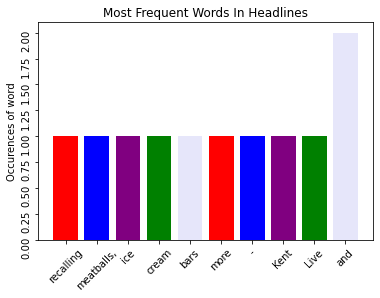

Find yous files here
C:\Users\Owner\Desktop\data_representation_assignment/analysis.xlsx
C:\Users\Owner\Desktop\data_representation_assignment/Output.html
an error occurred converting xls to html webpage


In [6]:
#Necessary pip installs from work on previous versions (more may be needed if program says module missing on your computer)

#pip install newsapi-python
#pip install xlsx2html
#pip install requests
#pip install googletrans
#pip install pypyodbc
#pip install pymysql
#pip install openfoodfacts==0.1.2

"--------------------------------------------------------------------------------------------------------------------------------------------------------"""

# Database is called news

# DROD DATABASE news;

# CREATE DATABASE news;
# USE news;
# CREATE TABLE headline_titles(ID int NOT NULL AUTO_INCREMENT, Title varchar(255), Language varchar(255), Translation varchar(255), Url varchar(255),PRIMARY KEY (ID));


"--------------------------------------------------------------------------------------------------------------------------------------------------------"""


#Setting up the imports

import webbrowser
import os
#from xlsx2html import xlsx2html #module to convert excel to html
import json
import requests
from newsapi import NewsApiClient
from googletrans import Translator
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
from openpyxl import Workbook, load_workbook
import openfoodfacts
import collections
import matplotlib.pyplot as plt

"--------------------------------------------------------------------------------------------------------------------------------------------------------"""


country_picker = input("Write a country name:")

brands = openfoodfacts.facets.get_brands(country_picker)

brand_dictionary = {}


brand_counter = 1
for brand_name in brands:
    print(brand_counter,brand_name["name"])
    bdv = brand_name["name"]
    brand_dictionary[brand_counter] = bdv
    brand_counter += 1
    if brand_counter == 11:
        break

brand_input = 0
while brand_input not in brand_dictionary.keys():
    brand_input = int(input("Write number for which brand you are interested in? e.g 1"))



brand_input_choice = brand_dictionary[brand_input]

"""
"--------------------------------------------------------------------------------------------------------------------------------------------------------"""


#Setting up translation modulue


translator = Translator()

#The codes in the dictionary represent keys used for translating into different languages with google translate
LANGUAGES = {
    1:['Danish','da'], 
    2:['Dutch','nl'], 
    3:['Finnish','fi'],
    4:['French','fr'],
    5:['German','de'], 
    6:['Italian','it'], 
    7:['Japanese','ja'], 
    8:['Luxembourgish','lb'], 
    9:['Malay','ms'],
    10:['Romanian','ro'], 
    11:['Swedish','sv'], }

#Print dictionary as menu
for key, value in LANGUAGES.items():
    print (key,value[0])

choose_a_language = 0

#Validate user input to make sure it is a dictionary key
while choose_a_language not in LANGUAGES.keys():
    choose_a_language = int(input("Choose a number to translate to language: e.g 1 danish"))

language_value = LANGUAGES[choose_a_language][1]
language_value2 = LANGUAGES[choose_a_language][0]


"--------------------------------------------------------------------------------------------------------------------------------------------------------"""
#Updating spreadsheet

Row_Incrementer = 1

workbook = Workbook()
sheet = workbook.active
sheet["A" + str(Row_Incrementer)] = "English"
sheet["B" + str(Row_Incrementer)] = "Translation"
sheet["C" + str(Row_Incrementer)] = language_value2
sheet["D" + str(Row_Incrementer)] = "URL"
workbook.save(filename="analysis.xlsx")
workbook.close()


def excel_row_update(translate_this, language_value2, title, url):

    global Row_Incrementer
    Row_Incrementer += 1

    workbook = load_workbook(filename="analysis.xlsx")
    sheet = workbook.active

    sheet["A" + str(Row_Incrementer)] = translate_this
    sheet["B" + str(Row_Incrementer)] = language_value2
    sheet["C" + str(Row_Incrementer)] = title
    sheet["D" + str(Row_Incrementer)] = url

    workbook.save(filename="analysis.xlsx")
    workbook.close()
    print("success added:", translate_this, title, url, "to spreadsheet")


def database_row_update(translate_this, language_value2, title, url):

    #Connect to MySQL database

    db = MySQLdb.connect(host="localhost",    # your host, usually localhost
    user="root",         # your username
    passwd="root",  # your password
    db="news")        # name of the data base

        # you must create a Cursor object. It will let
        #  you execute all the queries you need
    cur = db.cursor()


    #check database assignment for handling variables
    SQL = ("INSERT INTO headline_titles (Title, Language, Translation, Url) VALUES ('"+ translate_this +"','" + language_value2 + "', '"+ title +"', '"+ url +"');")
    cur.execute("INSERT INTO headline_titles (Title, Language, Translation, Url) VALUES ('"+ translate_this +"','" + language_value2 +"', '"+ title +"', '"+ url +"');")
    print(SQL)
    db.commit()
    db.close()


"--------------------------------------------------------------------------------------------------------------------------------------------------------"""
#Setting up extractions from News API

news_keyword = brand_input_choice #Brand chosen by user from openfoodfacts api

#news_keyword = input("Write a keyword to search the news , e.g. bitcoin")

# https://newsapi.org/docs/client-libraries/python
newsapi = NewsApiClient(api_key='0fb13acc3bc8480eafedb87afa941f7e')


# /v2/everything
all_articles = newsapi.get_everything(q=news_keyword)


from collections import Counter

analysis = Counter(all_articles)


for key in all_articles:
    print(key)

returned_data_from_api = all_articles['articles']


#https://www.programiz.com/python-programming/nested-dictionary
dictionary_length = len(returned_data_from_api)
print(dictionary_length)



"--------------------------------------------------------------------------------------------------------------------------------------------------------"""
#Setting up variables before the loop, these handle the number of iterations in the loop and position to publish content to excel

row = 0
excel_start_row = 1


column = 0
translated_column = 1
url_column = 2
url=""
translate_this = ""



"--------------------------------------------------------------------------------------------------------------------------------------------------------"""


my_string_for_word_count = "" #this string will be used for doing word count analysis

#The while loop below handle printing to console, saving to excel, saving to database



while row < dictionary_length:
    #https://docs.python.org/3/tutorial/errors.html
    try:
      
        print(returned_data_from_api[row]['title'])
        translate_this = returned_data_from_api[row]['title']

        my_string_for_word_count = my_string_for_word_count + translate_this #adding one healine at a time to the string for word count analysis

        
        translate_this = str(translate_this)
        translation = translator.translate(translate_this, dest=language_value)
        
        title = translation.text 
        print("Title", title)

        
        print(returned_data_from_api[row]['url'])
        
        url = returned_data_from_api[row]['url']


        excel_row_update(translate_this, language_value2, title, url) #update spreadsheet

        database_row_update(translate_this, language_value2, title, url) #update database
        
                
        row += 1

    except UnicodeEncodeError:
        print('UnicodeEncodeError encountered')
        break
    except:
        break


#this code below does a word count analysis
#https://www.w3resource.com/python-exercises/string/python-data-type-string-exercise-12.php
def word_count(str):
    counts = {}
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

counted_words =  word_count(my_string_for_word_count)


sorted_dict = collections.OrderedDict(counted_words)



x = sorted_dict

#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sorted_x = sorted(x.items(), key=lambda kv: kv[1])


#https://stackoverflow.com/questions/646644/how-to-get-last-items-of-a-list-in-python
my_graph_data = list(sorted_x)[-10:]
my_graph_data_dict = dict(my_graph_data)



#https://www.kite.com/python/answers/how-to-plot-a-bar-chart-using-a-dictionary-in-matplotlib-in-python
a_dictionary = x
keys = my_graph_data_dict.keys()
values = my_graph_data_dict.values()

#https://www.kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
plt.xticks(rotation=45)
plt.yticks(rotation=90)
#https://showmecode.info/matplotlib/bar/change-bar-color/
plt.bar(keys, values,  color=['red', 'blue', 'purple', 'green', 'lavender'])
plt.ylabel('Occurences of word')
plt.title('Most Frequent Words In Headlines')
#https://www.kite.com/python/answers/how-save-a-matplotlib-plot-as-a-pdf-file-in-python
plt.savefig("plots.pdf")
plt.show()

"--------------------------------------------------------------------------------------------------------------------------------------------------------"""



#get current working directory so that files can be published and saved to same folder as the python app
path = os.getcwd()

print("Find yous files here")
print(path+ "/analysis.xlsx")
print(path+ "/Output.html")
# /Users/mbp/Documents/my-project/python-snippets/notebook


try:
    #https://pypi.org/project/xlsx2html/
    xlsx2html('analysis.xlsx', 'Output.html')
except:
    print("an error occurred converting xls to html webpage")
try:
    webbrowser.open(path + "/Output.html")
except:
    print("an error occured loading browser")

#possible alternative for generating html for files    
#https://stackoverflow.com/questions/41671436/how-convert-python-dictionary-to-html-table